In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv("/content/teams.csv")
df

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [27]:
df.shape

(2144, 11)

In [28]:
df.columns

Index(['team', 'country', 'year', 'events', 'athletes', 'age', 'height',
       'weight', 'medals', 'prev_medals', 'prev_3_medals'],
      dtype='object')

In [29]:
df = df[['team', 'country', 'year', 'events', 'athletes', 'age', 'height',
       'weight', 'prev_medals', 'medals', ]]

In [30]:
df.shape

(2144, 10)

In [31]:
df.isnull().sum()

team             0
country          0
year             0
events           0
athletes         0
age              0
height           0
weight           0
prev_medals    130
medals           0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         2144 non-null   object 
 1   country      2144 non-null   object 
 2   year         2144 non-null   int64  
 3   events       2144 non-null   int64  
 4   athletes     2144 non-null   int64  
 5   age          2144 non-null   float64
 6   height       2144 non-null   float64
 7   weight       2144 non-null   float64
 8   prev_medals  2014 non-null   float64
 9   medals       2144 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 167.6+ KB


In [33]:
df.duplicated().sum()

0

In [34]:
df['prev_medals'] = df['prev_medals'].fillna(0)

In [35]:
df.isnull().sum()

team           0
country        0
year           0
events         0
athletes       0
age            0
height         0
weight         0
prev_medals    0
medals         0
dtype: int64

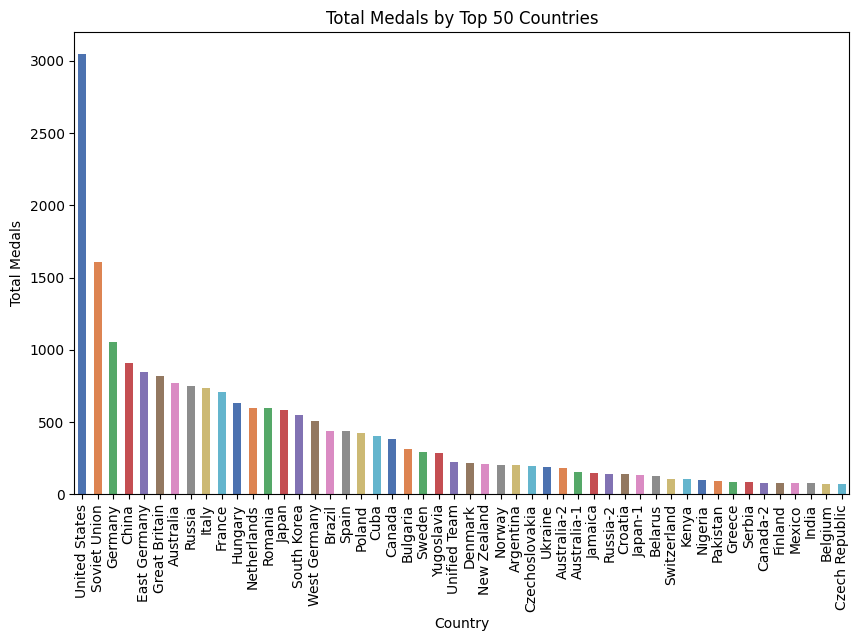

In [64]:
colors = sns.color_palette("deep")

medals_by_country = df.groupby('country')['medals'].sum().sort_values(ascending=False)
top_10_countries = medals_by_country.head(50)
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color=colors)
plt.title('Total Medals by Top 50 Countries')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.show()

In [52]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,year,events,athletes,age,height,weight,prev_medals,medals
year,1.000000,-0.016345,-0.056957,-0.012179,-0.001459,0.031400,-0.002625,-0.021603
events,-0.016345,1.000000,0.976446,0.053461,0.208067,0.127031,0.743458,0.771330
athletes,-0.056957,0.976446,1.000000,0.036358,0.186134,0.109439,0.801140,0.840817
age,-0.012179,0.053461,0.036358,1.000000,0.173694,0.220497,0.034685,0.025096
height,-0.001459,0.208067,0.186134,0.173694,1.000000,0.687398,0.134798,0.141055
weight,0.031400,0.127031,0.109439,0.220497,0.687398,1.000000,0.086787,0.090577
prev_medals,-0.002625,0.743458,0.801140,0.034685,0.134798,0.086787,1.000000,0.909139
medals,-0.021603,0.771330,0.840817,0.025096,0.141055,0.090577,0.909139,1.000000


In [56]:
numeric_df.corr()["medals"]

year          -0.021603
events         0.771330
athletes       0.840817
age            0.025096
height         0.141055
weight         0.090577
prev_medals    0.909139
medals         1.000000
Name: medals, dtype: float64

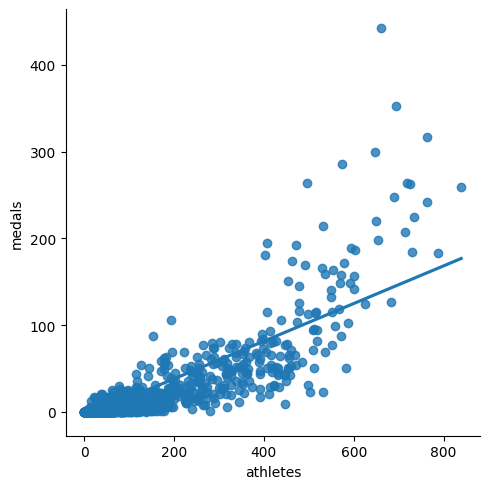

In [67]:
sns.lmplot(x="athletes", y="medals", data=df, fit_reg = True, ci = None)

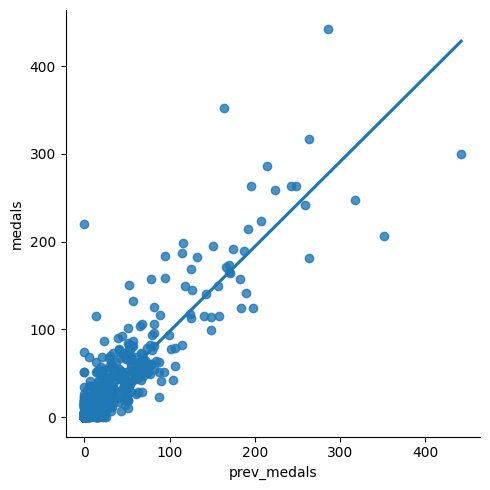

In [68]:
sns.lmplot(x="prev_medals", y="medals", data=df, fit_reg = True, ci = None)

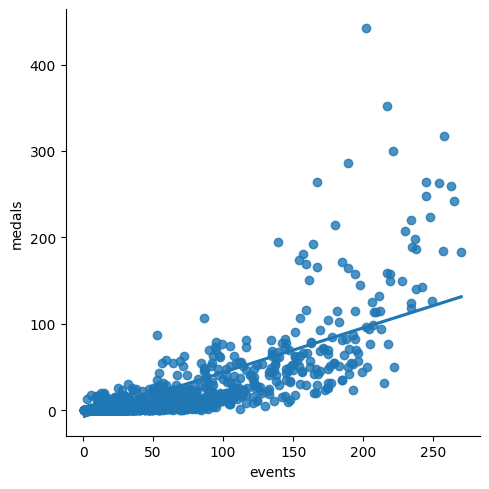

In [69]:
sns.lmplot(x="events", y="medals", data=df, fit_reg = True, ci = None)

In [72]:
df['year'].values

array([1964, 1968, 1972, ..., 2008, 2012, 2016])

In [73]:
train = df[df['year'] < 2012].copy()
test = df[df['year'] >= 2012].copy()

In [74]:
train.shape, test.shape

((1736, 10), (408, 10))

## Model Building

In [75]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predictors = ['athletes', 'prev_medals', 'events']
target = 'medals'
reg.fit(train[predictors], train[target])

LinearRegression()

In [76]:
predictions = reg.predict(test[predictors])
test['predictions'] = predictions

In [80]:
test.loc[test["predictions"] < 0, "predictions"] = 0
test['predictions'] = test['predictions'].round()

In [81]:
error = mean_absolute_error(test["medals"], test['predictions'])
error

3.215686274509804

In [86]:
df.describe()["medals"]

count    2144.000000
mean       10.556437
std        33.028143
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       442.000000
Name: medals, dtype: float64

In [89]:
test["predictions"] = predictions

In [90]:
test[test["team"] == "USA"]

,team,country,year,events,athletes,age,height,weight,prev_medals,medals,predictions
2053,USA,United States,2012,245,689,26.7,178.3,74.7,317.0,248,274.793495
2054,USA,United States,2016,245,719,26.4,178.0,73.8,248.0,264,238.167795


In [91]:
errors = abs(test["medals"] - test["predictions"])

In [92]:
errors_team = errors.groupby(test["team"]).mean().sort_values(ascending=False)
medals_team = test["medals"].groupby(test["team"]).mean().sort_values(ascending=False)
error_ratio = errors_team / medals_team

In [96]:
error_ratio = error_ratio[np.isfinite(error_ratio)]

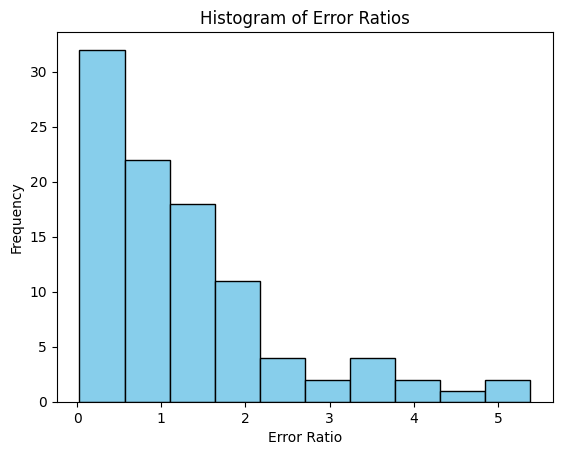

In [99]:
error_ratio.plot.hist(color='skyblue', edgecolor='black', bins=10)
plt.title('Histogram of Error Ratios')
plt.xlabel('Error Ratio')
plt.ylabel('Frequency')
plt.show()

In [101]:
error_ratio.sort_values()

team
FRA    0.028425
RUS    0.045375
NZL    0.053203
ETH    0.055413
HUN    0.098856
         ...   
PHI    3.780755
VEN    3.839499
AUT    4.672492
HKG    5.329173
UAE    5.385197
Length: 98, dtype: float64

## Modeling for Countries with Low Medal Counts

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [113]:
X = df[['events', 'athletes', 'age', 'height', 'weight', 'prev_medals']]
y = df['medals']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [115]:
predictions = model.predict(X_test)
X_test['predicted_medals'] = predictions
X_test['actual_medals'] = y_test.reset_index(drop=True)

# Add team names for plotting
X_test['team'] = df.loc[X_test.index, 'team']
print(X_test)

      events  athletes   age  height  weight  prev_medals  predicted_medals  \
1344       4         4  24.0   172.5    69.0          0.0          0.015513   
1934       5         9  24.3   171.8    71.1          0.0          0.914433   
128       62        93  27.3   178.0    70.2          8.0          4.173417   
332        4         4  23.8   167.2    62.8          0.0         -0.299195   
1163       8         9  25.8   175.0    64.0          0.0         -0.583440   
...      ...       ...   ...     ...     ...          ...               ...   
544        2         2  25.0   164.0    55.0          0.0         -0.436818   
1200       7         9  28.2   177.8    72.4          0.0          0.077431   
508       86       118  25.4   173.9    73.0         47.0         25.338179   
1332       5         5  24.4   174.0    72.8          0.0          0.031031   
2044     185       578  23.6   177.6    71.7        166.0        173.161408   

      actual_medals team  
1344            NaN  MON

## Ploiting KDE for predicted and actual medals

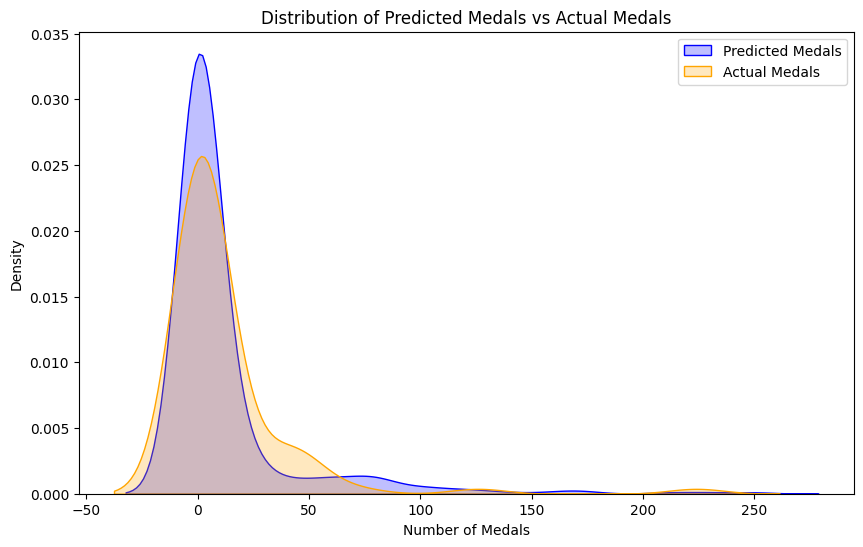

In [121]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=X_test['predicted_medals'], color='blue', shade=True)
sns.kdeplot(data=X_test['actual_medals'], color='orange', shade=True)
plt.title('Distribution of Predicted Medals vs Actual Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Density')
plt.legend(['Predicted Medals', 'Actual Medals'])
plt.show()